In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import textblob
from textblob import TextBlob
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report

## EDA

In [2]:
data = pd.read_excel('Swiggy_Dataset.xlsx')

In [3]:
data.columns

Index(['date', 'favorite_count', 'followers_count', 'friends_count',
       'full_text', 'retweet_count', 'retweeted', 'screen_name', 'tweet_id',
       'user_id'],
      dtype='object')

In [4]:
print('Count of columns in the data is:  ', len(data.columns))
print('Count of rows in the data is:  ', len(data))

Count of columns in the data is:   10
Count of rows in the data is:   16712


In [5]:
data.duplicated().sum()

0

In [6]:
data.head()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,0.0,syamantak1,1,61959419
1,7/18/2019 22:43,0,102,129,@SwiggyCares I hope so.,0,0.0,Bharatbbhushn,2,143284383
2,7/18/2019 22:37,0,102,129,@SwiggyCares I think you have the order detail...,0,0.0,Bharatbbhushn,3,143284383
3,7/18/2019 22:35,0,13,16,"@swiggy_in People are complaining here also, i...",0,0.0,taifkhalid01,4,830340000000000000
4,7/18/2019 22:25,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,0.0,Bharatbbhushn,5,143284383


In [7]:
data.tail()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
16707,2019-11-07 12:13:00,0,0,2,@SwiggyCares they said as delivery box is not ...,0,0.0,UmmeMohammad18,16708,1144990000000000000
16708,2019-11-07 12:12:00,0,106,146,"@swiggy_in Deliver to karta nahi, install kyo ...",0,0.0,Desi_Life1,16709,1039410000000000000
16709,2019-11-07 12:11:00,0,91,248,@swiggy_in thanks for spilling my drink. I wai...,0,0.0,Pinks_Forever_,16710,1700914573
16710,2019-11-07 12:11:00,0,0,2,@SwiggyCares hello there i use swigggy regular...,0,0.0,UmmeMohammad18,16711,1144990000000000000
16711,2019-11-07 12:09:00,0,54,163,@Being_Humor @ZomatoIN @swiggy_in can you help...,0,0.0,TejasShelar2498,16712,717511000000000000


In [8]:
data.shape

(16712, 10)

In [9]:
data.isnull().sum()

date                  0
favorite_count        0
followers_count       0
friends_count         0
full_text             0
retweet_count         0
retweeted          2328
screen_name           0
tweet_id              0
user_id               0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             16712 non-null  object 
 1   favorite_count   16712 non-null  int64  
 2   followers_count  16712 non-null  int64  
 3   friends_count    16712 non-null  int64  
 4   full_text        16712 non-null  object 
 5   retweet_count    16712 non-null  int64  
 6   retweeted        14384 non-null  float64
 7   screen_name      16712 non-null  object 
 8   tweet_id         16712 non-null  int64  
 9   user_id          16712 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.3+ MB


In [11]:
data["retweeted"].fillna("True",inplace = True)

In [12]:
data.isnull().sum()

date               0
favorite_count     0
followers_count    0
friends_count      0
full_text          0
retweet_count      0
retweeted          0
screen_name        0
tweet_id           0
user_id            0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             16712 non-null  object
 1   favorite_count   16712 non-null  int64 
 2   followers_count  16712 non-null  int64 
 3   friends_count    16712 non-null  int64 
 4   full_text        16712 non-null  object
 5   retweet_count    16712 non-null  int64 
 6   retweeted        16712 non-null  object
 7   screen_name      16712 non-null  object
 8   tweet_id         16712 non-null  int64 
 9   user_id          16712 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.3+ MB


In [14]:
 from wordcloud import WordCloud, STOPWORDS

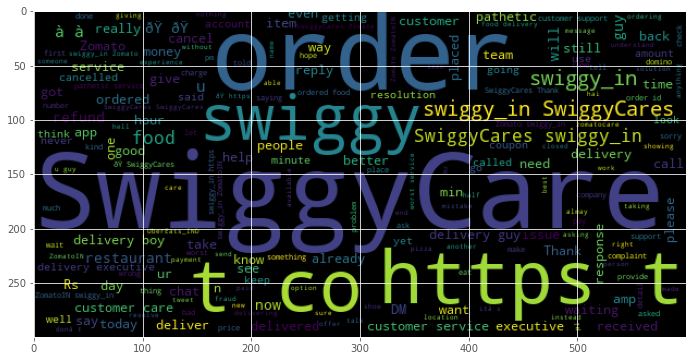

In [15]:
plt.figure(figsize=(15,6))
wc = WordCloud(width=600, height=300).generate(' '.join(data.full_text))
plt.imshow(wc)

## Defining set containing all stopwords in English.

In [16]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [17]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['full_text'] = data['full_text'].apply(lambda text: cleaning_stopwords(text))
data['full_text'].head()


0    @Mahi_2510 @swiggy_in The ultimate answer b so...
1                              @SwiggyCares I hope so.
2    @SwiggyCares I think order details, number pre...
3    @swiggy_in People complaining also, know You l...
4    @SwiggyCares Do even know meaning tagline, DM'...
Name: full_text, dtype: object

In [18]:
len(data.index)

16712

In [19]:
# Total tweets
print("Total tweets this period:", len(data.index))

Total tweets this period: 16712


In [20]:
# Retweets
tweet_df = data.sort_values(by="retweet_count", ascending = False)

In [21]:
tweet_df

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
9258,6/14/2019 17:57,916,7111,344,.@SwiggyCares Pic 1: customer Guy Pic 2: custo...,487,0,Ibleed_sarcasm,9259,389358335
5124,2019-02-06 15:10:00,374,915,449,I craved Ice Creame scorching afternoon Ordere...,64,True,DhooDala,5125,2748252979
1176,6/22/2019 11:52,55,17018,1781,#ShameOnSwiggy! @swiggy_in delivery agents vio...,37,0,RoadsOfMumbai,1177,4774969895
10721,2019-12-06 15:29:00,19,47877,651,Co-Founder &amp; CTO Indiaâ€™s fastest Unicorn...,34,0,TOIBengaluru,10722,31058922
11476,7/15/2019 13:17,13,14,76,@SwiggyCares @PMCPune @CMOMaharashtra @MountNG...,29,0,SudhirKumar3,11477,285580274
...,...,...,...,...,...,...,...,...,...,...
5739,6/16/2019 19:00,0,6,17,@SwiggyCares @vsbhatia I ordered desert occasi...,0,0,44e22db92d63459,5740,3047564034
5740,6/16/2019 18:58,0,540,483,@swiggy_in seems enjoyed #INDvPAK match. Had s...,0,0,bajajhiteshster,5741,67272307
5741,6/16/2019 18:58,0,90,46,@zomatocare @deepigoyal @ZomatoIN @dineout_ind...,0,0,happydraj,5742,46943858
5742,6/16/2019 18:57,0,2,70,@SwiggyCares Already dm please check,0,0,SahilAg06522567,5743,1050840000000000000


## Top 5 Retweet

In [22]:
tweet_df = data.reset_index(drop = True)
print ("Mean retweets:", round(data['retweet_count'].mean(),2))
print("Top 5 RTed tweets:")
print('-----------------------')
for i in range(5):
    print(data['full_text'].loc[i],'-', data['retweet_count'].loc[i])

Mean retweets: 0.14
Top 5 RTed tweets:
-----------------------
@Mahi_2510 @swiggy_in The ultimate answer b sorry ... They assure ... - 0
@SwiggyCares I hope so. - 0
@SwiggyCares I think order details, number present there? If yea call right now. - 0
@swiggy_in People complaining also, know You little disappointed service, but customer service center make direct messages, It not necessary every time everything perfect, sometimes mistakes happen - 0
@SwiggyCares Do even know meaning tagline, DM's won't work. I want explanation here. - 0


# Sentiment Analysis

In [23]:
data.columns

Index(['date', 'favorite_count', 'followers_count', 'friends_count',
       'full_text', 'retweet_count', 'retweeted', 'screen_name', 'tweet_id',
       'user_id'],
      dtype='object')

In [24]:
text_df = data.drop(['date', 'favorite_count', 'followers_count', 'friends_count',
        'retweet_count', 'retweeted', 'screen_name', 'tweet_id',
       'user_id'], axis =1)
text_df.head()

,full_text
0,@Mahi_2510 @swiggy_in The ultimate answer b so...
1,@SwiggyCares I hope so.
2,"@SwiggyCares I think order details, number pre..."
3,"@swiggy_in People complaining also, know You l..."
4,"@SwiggyCares Do even know meaning tagline, DM'..."


In [25]:
print(text_df['full_text'].iloc[0],"\n")
print(text_df['full_text'].iloc[1],"\n")
print(text_df['full_text'].iloc[2],"\n")
print(text_df['full_text'].iloc[3],"\n")
print(text_df['full_text'].iloc[4],"\n")

@Mahi_2510 @swiggy_in The ultimate answer b sorry ... They assure ... 

@SwiggyCares I hope so. 

@SwiggyCares I think order details, number present there? If yea call right now. 

@swiggy_in People complaining also, know You little disappointed service, but customer service center make direct messages, It not necessary every time everything perfect, sometimes mistakes happen 

@SwiggyCares Do even know meaning tagline, DM's won't work. I want explanation here. 



In [26]:
def data_processing(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text)
    text = re.sub(r'#','',text)
    text = re.sub(r'_', '',text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)
    
text_df['full_text'] = text_df['full_text'].apply(data_processing)

In [27]:
text_df = text_df.drop_duplicates('full_text')

In [28]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [29]:
# text_df['full_text'] = data['full_text'].apply(lambda x: stemming(x))

In [30]:
text_df

,full_text
0,2510 The ultimate answer b sorry ... They assu...
1,I hope .
2,"I think order details , number present ? If ye..."
3,"People complaining also , know You little disa..."
4,"Do even know meaning tagline , DM 's wo n't wo..."
...,...
16707,said delivery box ready deliver canceling orde...
16708,"Deliver karta nahi , install kyo karenðŸ˜¡"
16709,thanks spilling drink . I waited call inform d...
16710,hello use swigggy regularly order food . Today...


In [31]:
print(text_df['full_text'].iloc[0],"\n")
print(text_df['full_text'].iloc[1],"\n")
print(text_df['full_text'].iloc[2],"\n")
print(text_df['full_text'].iloc[3],"\n")
print(text_df['full_text'].iloc[4],"\n")

2510 The ultimate answer b sorry ... They assure ... 

I hope . 

I think order details , number present ? If yea call right . 

People complaining also , know You little disappointed service , customer service center make direct messages , It necessary every time everything perfect , sometimes mistakes happen 

Do even know meaning tagline , DM 's wo n't work . I want explanation . 



In [32]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [33]:
text_df['polarity'] = data['full_text'].apply(polarity)

In [34]:
text_df.head()

,full_text,polarity
0,2510 The ultimate answer b sorry ... They assu...,-0.250000
1,I hope .,0.000000
2,"I think order details , number present ? If ye...",0.142857
3,"People complaining also , know You little disa...",0.010417
4,"Do even know meaning tagline , DM 's wo n't wo...",0.000000


In [50]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    else:
        return "Positive"

In [51]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [52]:
text_df.head()

,full_text,polarity,sentiment
0,2510 The ultimate answer b sorry ... They assu...,-0.250000,Negative
1,I hope .,0.000000,Neutral
2,"I think order details , number present ? If ye...",0.142857,Positive
3,"People complaining also , know You little disa...",0.010417,Positive
4,"Do even know meaning tagline , DM 's wo n't wo...",0.000000,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

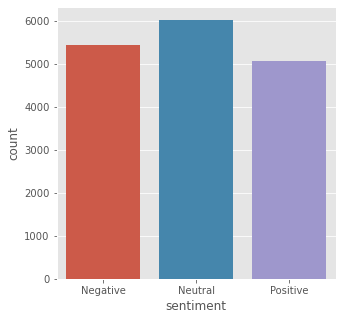

In [53]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data= text_df)

Text(0.5, 1.0, 'Distribution  of sentiment')

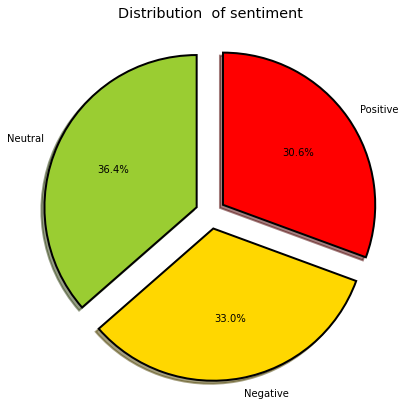

In [54]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold","red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct = '%1.1f%%', shadow = True, colors = colors,
         startangle = 90, wedgeprops = wp, explode = explode, label ='')
plt.title('Distribution  of sentiment')

## Top Positive Sentences

In [55]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'],ascending = False)
pos_tweets.head()

,full_text,polarity,sentiment
4882,Impressed automation !,1.0,Positive
4691,.... Just Look Service food People serve . Qui...,1.0,Positive
5892,My father best friend .,1.0,Positive
5886,It takes Sperm DAD . wonderful Dads thank cont...,1.0,Positive
5873,Happy Father day ! !,1.0,Positive


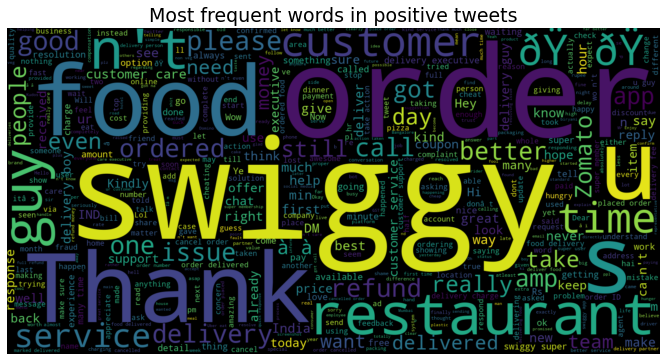

In [56]:
text = ' '.join([word for word in pos_tweets['full_text']])
plt.figure(figsize=(15,6), facecolor='None')
wordcloud = WordCloud(max_words = 500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

## Top Negative Sentances

In [61]:
j =1
sortedDF = text_df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['sentiment'][i] == 'Negative'):
        print(str(j) + ')' +sortedDF['full_text'][i])
        print()
        j = j+1

1)2510 The ultimate answer b sorry ... They assure ...

2)Well order delivered , delivery person 's number switched ! World class service really care : (

3).. I n't know swiggy getting worst day day . There time Swiggy known services .. last order delivered 2 hours food packagimg spoiled , aslo shared theier chat

4)along foreign funds trying distribute ? ?

5)What u mean DM ?

6)Few days back I ordered food see I received ...

7)45 minutes restaurant confirmed order .

8)What service giving customers u also started cheating customers . Pathetic service day day . help never helps instead dissatisfied everyone . No response customers . Do u believe profit yo

9)worst bad faad delivered awiggy .. Thus chole I roti tight animals also eate ...



KeyError: 33

## Top Neutral Sentences

In [62]:
j =1
sortedDF = text_df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['sentiment'][i] == 'Neutral'):
        print(str(j) + ')' +sortedDF['full_text'][i])
        print()
        j = j+1

1)I hope .

2)Do even know meaning tagline , DM 's wo n't work . I want explanation .

3)Inbox check kare huzoor

4)I hope hire educated professionals pls read pur chat thread put end asap .

5)Their associate showing canned/templates .. sumone ordering food 3 clock , need understand trust guys .. You guys get details number 9990361119

6)Delivery boy ne maara kya ?

7)And continues .

8)And customer care equally clueless .

9)Tried response

10)Your App says Delivery guy reached restaurant going somewhere else .

11)It month I order food Swiggy rate food differ offline restaurant .. cheaters



KeyError: 33

In [63]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['full_text'])

In [64]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 149565

First 20 features:
 ['00', '00 04', '00 15', '00 23', '00 25pct', '00 34', '00 absolute', '00 am', '00 amazon', '00 and', '00 card', '00 charging', '00 clock', '00 contacted', '00 domino', '00 expecting', '00 extended', '00 happened', '00 order', '00 pm']


In [65]:
X = text_df['full_text']
Y = text_df['sentiment']
X = vect.transform(X)

In [66]:
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [67]:
print("Size of x_train", (x_train.shape))
print("Size of y_train", (y_train.shape))
print("Size of x_test", (x_test.shape))
print("Size of y_test", (y_test.shape))

Size of x_train (13238, 149565)
Size of y_train (13238,)
Size of x_test (3310, 149565)
Size of y_test (3310,)


## Logistic Regression Model

In [68]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.23%


In [69]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[ 832  154   95]
 [  45 1140   26]
 [  76  159  783]]


              precision    recall  f1-score   support

    Negative       0.87      0.77      0.82      1081
     Neutral       0.78      0.94      0.86      1211
    Positive       0.87      0.77      0.81      1018

    accuracy                           0.83      3310
   macro avg       0.84      0.83      0.83      3310
weighted avg       0.84      0.83      0.83      3310



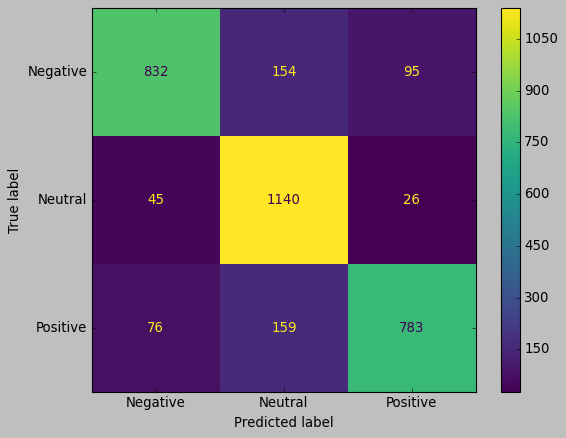

In [70]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [71]:
 from sklearn.model_selection import GridSearchCV

In [72]:
param_grid={'C':[0.001, 0.01, 0.1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 10]})

In [73]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [74]:
y_pred = grid.predict(x_test)

In [75]:
#now improve the accuracy
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.59%


In [76]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[ 832  154   95]
 [  45 1140   26]
 [  76  159  783]]


              precision    recall  f1-score   support

    Negative       0.87      0.77      0.82      1081
     Neutral       0.78      0.94      0.86      1211
    Positive       0.87      0.77      0.81      1018

    accuracy                           0.83      3310
   macro avg       0.84      0.83      0.83      3310
weighted avg       0.84      0.83      0.83      3310



## SVC

In [77]:
from sklearn.svm import LinearSVC

In [78]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [79]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 85.38%


In [80]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 867  129   85]
 [  39 1146   26]
 [  80  125  813]]


              precision    recall  f1-score   support

    Negative       0.88      0.80      0.84      1081
     Neutral       0.82      0.95      0.88      1211
    Positive       0.88      0.80      0.84      1018

    accuracy                           0.85      3310
   macro avg       0.86      0.85      0.85      3310
weighted avg       0.86      0.85      0.85      3310



### perform hyper paramter tunning for svm model

In [81]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernal':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma' :[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 10]})

In [82]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [83]:
y_pred = grid.predict(x_test)

In [84]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy:{:.2f}%".format(logreg_acc*100))

Test accuracy:84.32%


In [85]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 864  133   84]
 [  49 1137   25]
 [  92  136  790]]


              precision    recall  f1-score   support

    Negative       0.86      0.80      0.83      1081
     Neutral       0.81      0.94      0.87      1211
    Positive       0.88      0.78      0.82      1018

    accuracy                           0.84      3310
   macro avg       0.85      0.84      0.84      3310
weighted avg       0.85      0.84      0.84      3310

